In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
data = pd.read_csv('data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Basic information and statistics
print(data.info())
print("\nBasic Statistics:")
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   number_people         62184 non-null  int64         
 1   date                  62184 non-null  object        
 2   timestamp             62184 non-null  datetime64[ns]
 3   day_of_week           62184 non-null  int64         
 4   is_weekend            62184 non-null  int64         
 5   is_holiday            62184 non-null  int64         
 6   temperature           62184 non-null  float64       
 7   is_start_of_semester  62184 non-null  int64         
 8   is_during_semester    62184 non-null  int64         
 9   month                 62184 non-null  int64         
 10  hour                  62184 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 5.2+ MB
None

Basic Statistics:
       number_people            

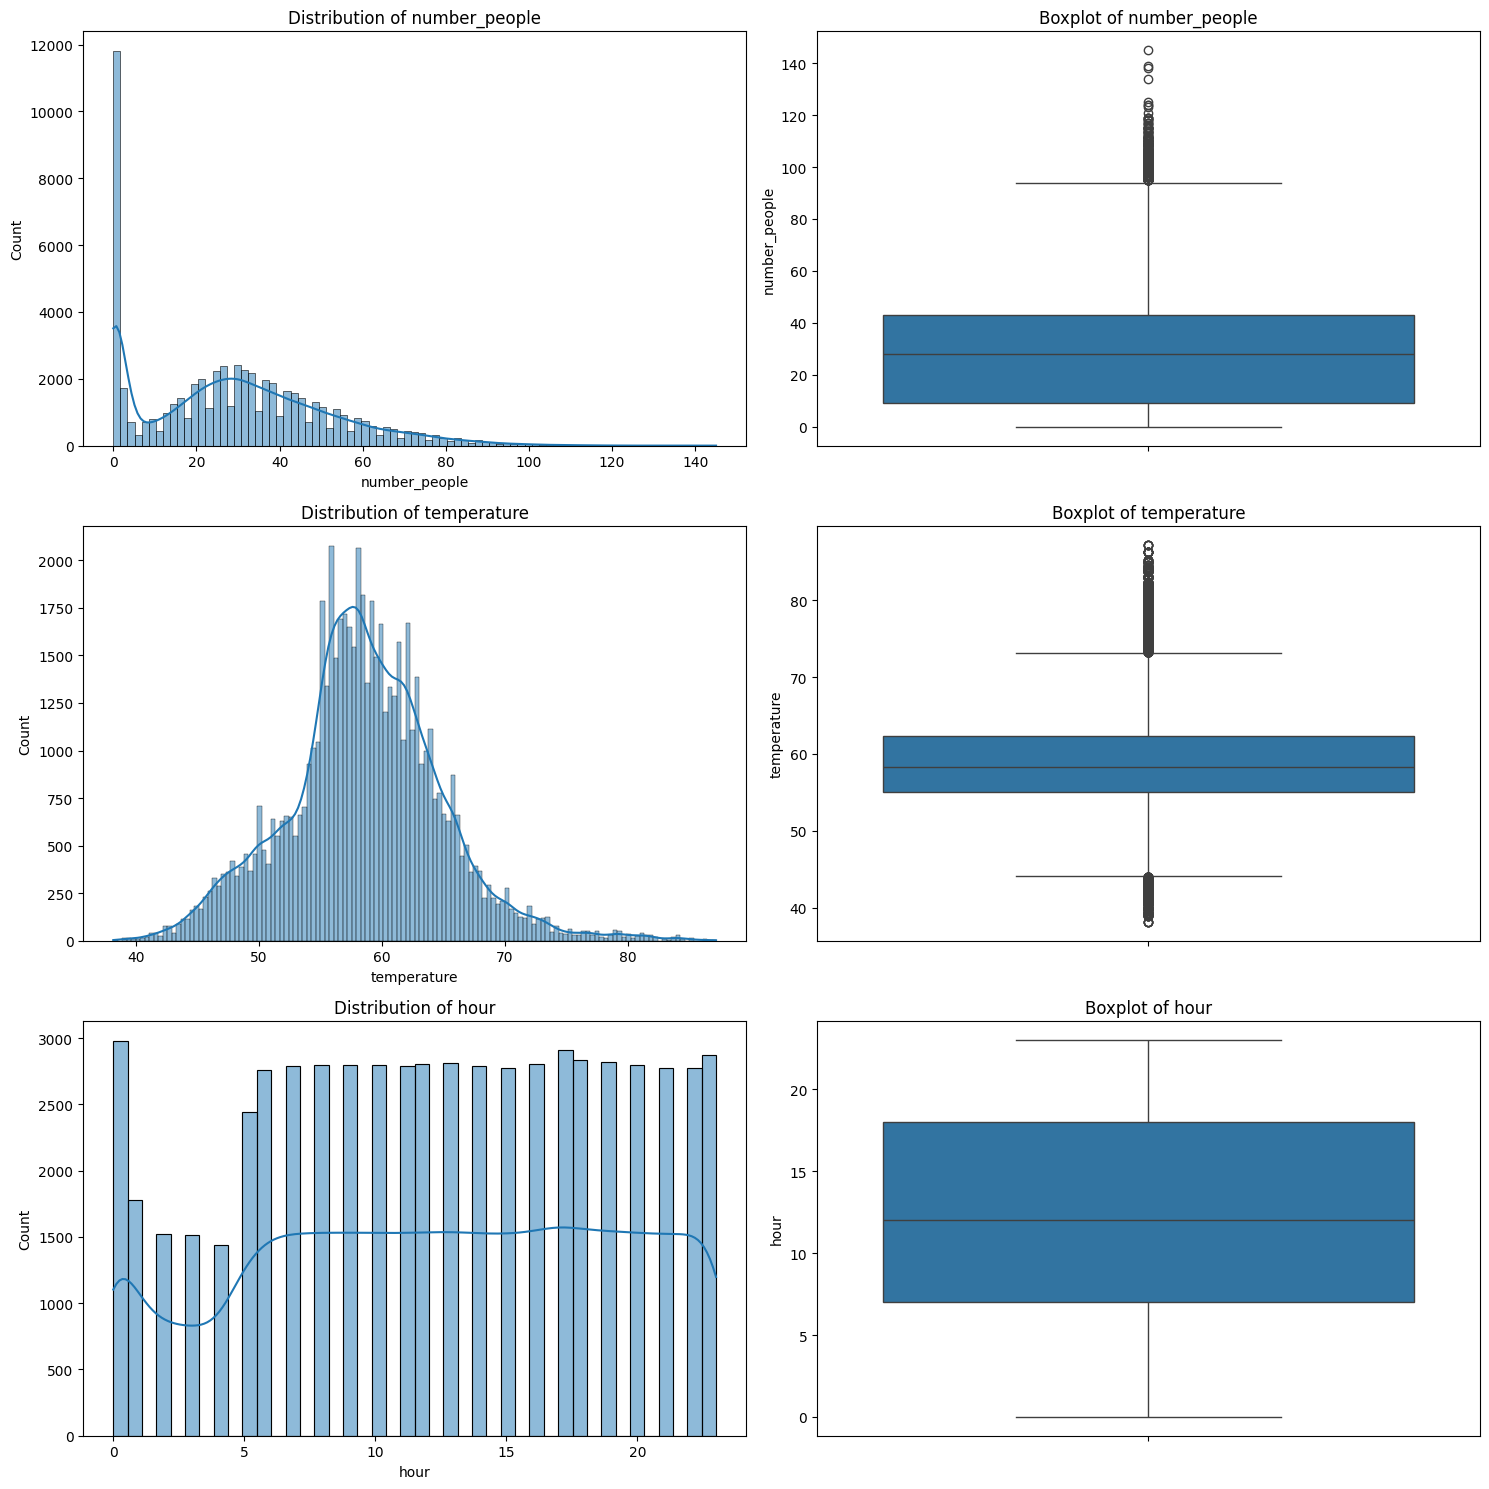

In [67]:

# Univariate Analysis
numeric_cols = ['number_people', 'temperature', 'hour']
categorical_cols = ['day_of_week', 'is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester', 'month']

# Numeric variables
plt.figure(figsize=(15, 5*len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, 2*i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(len(numeric_cols), 2, 2*i+2)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


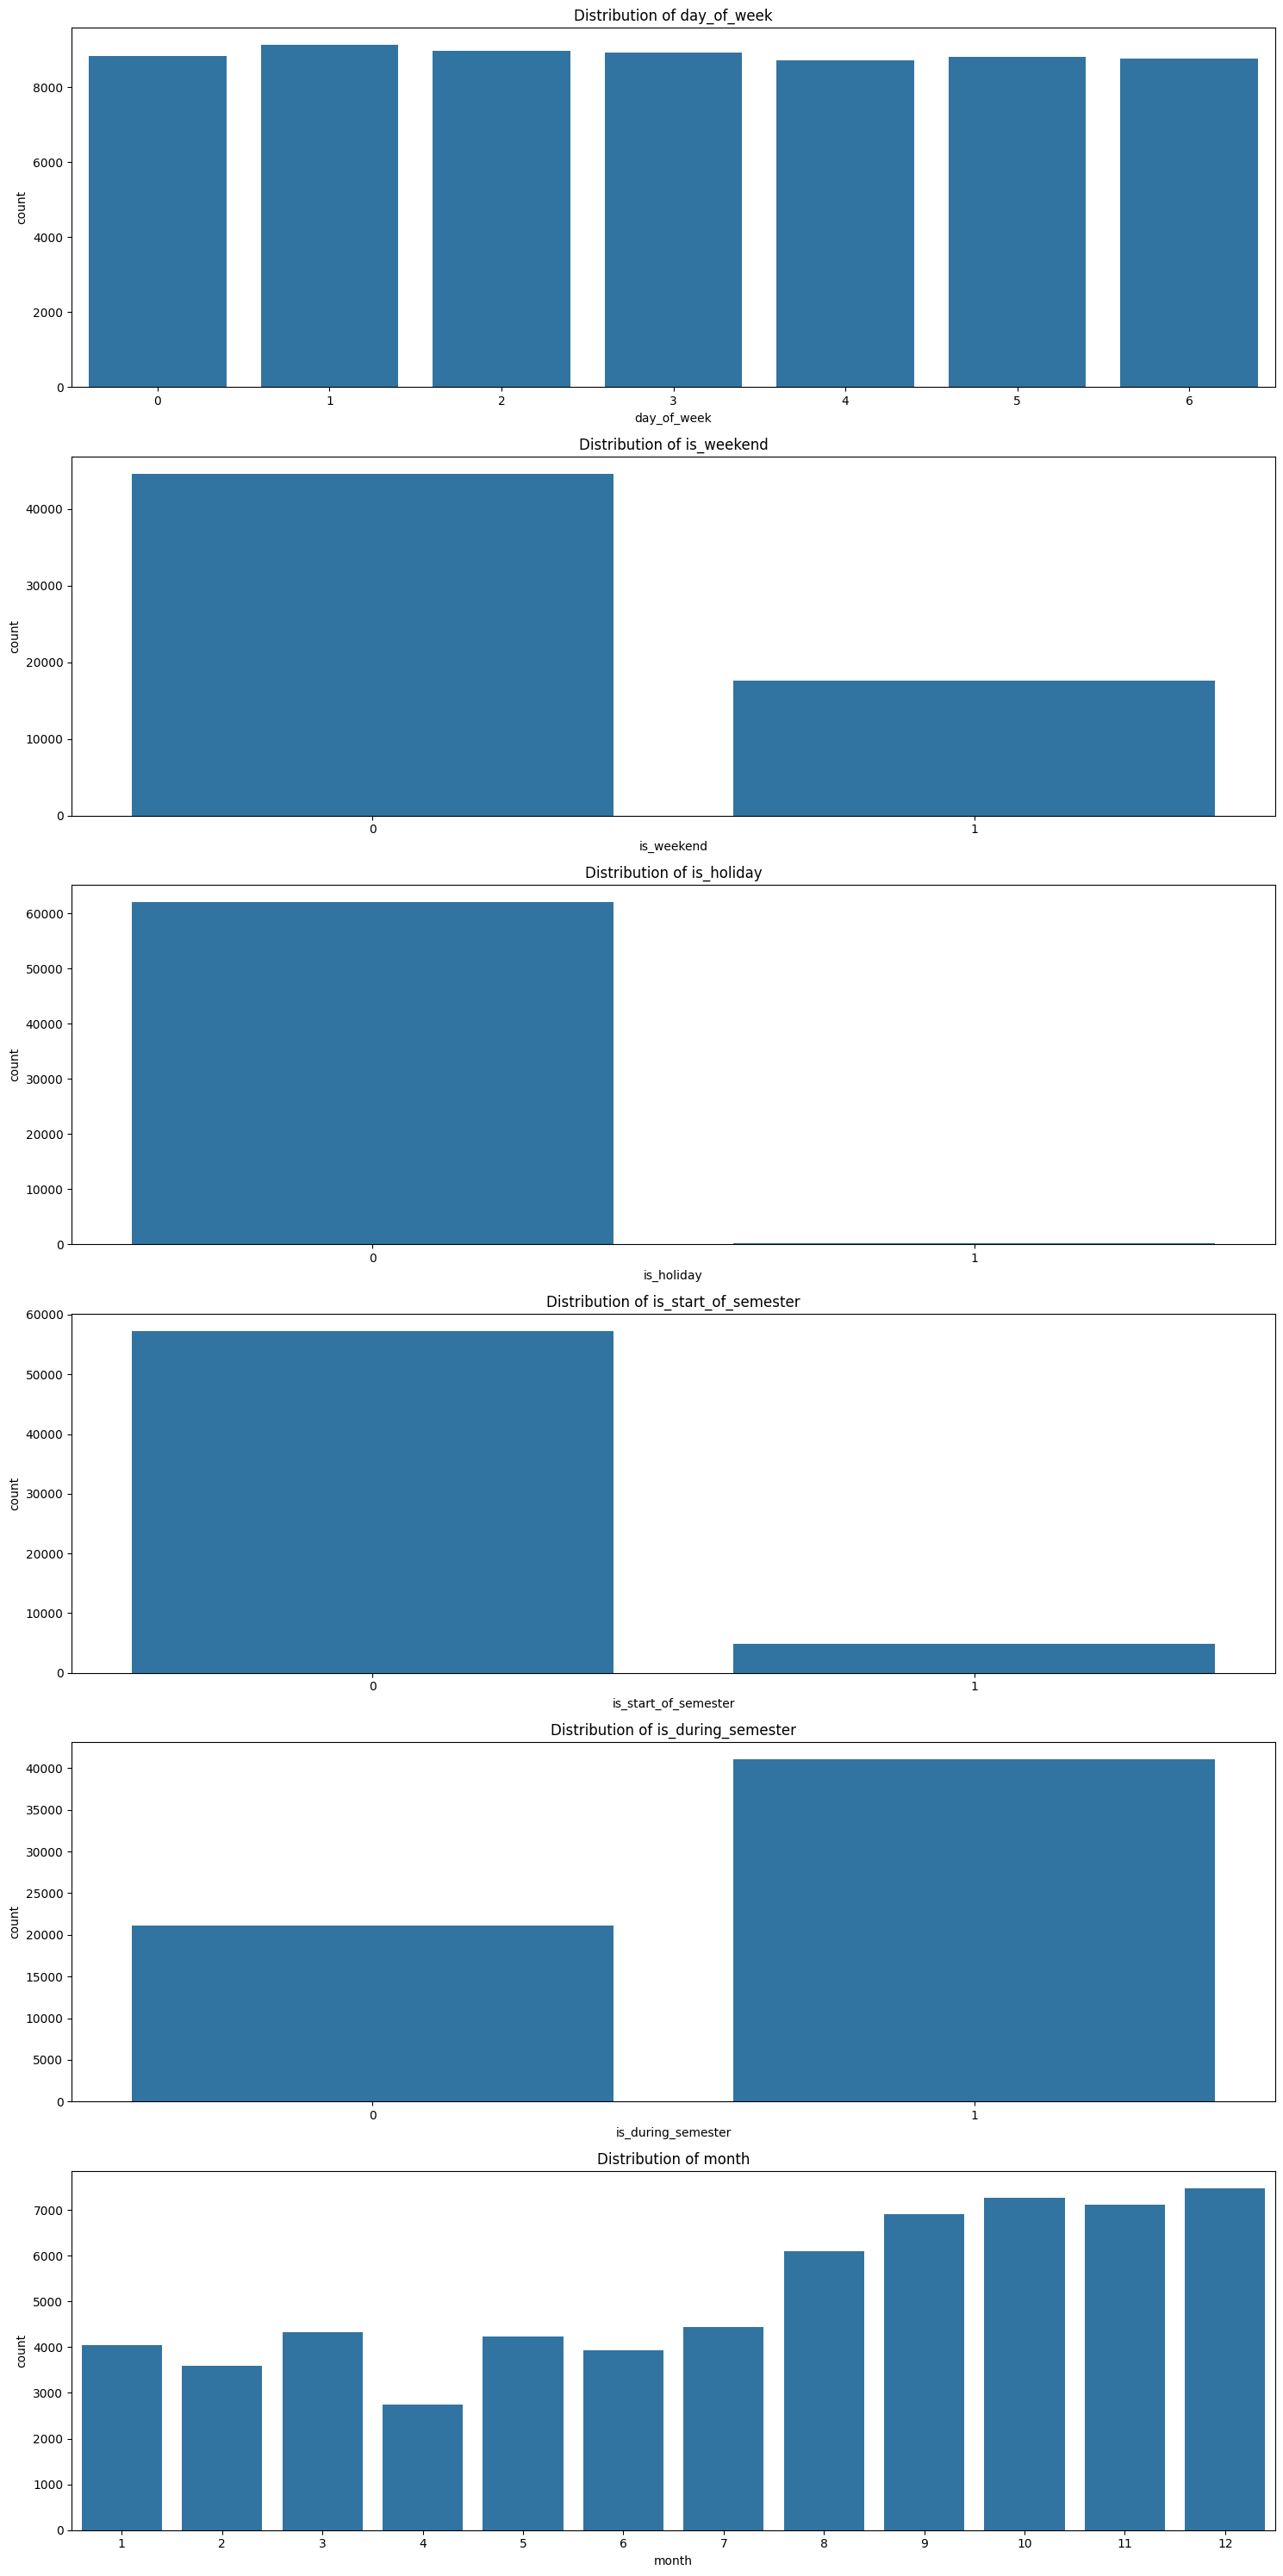

In [68]:

# Categorical variables
plt.figure(figsize=(15, 5*len(categorical_cols)))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i+1)
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


<Figure size 1500x1500 with 0 Axes>

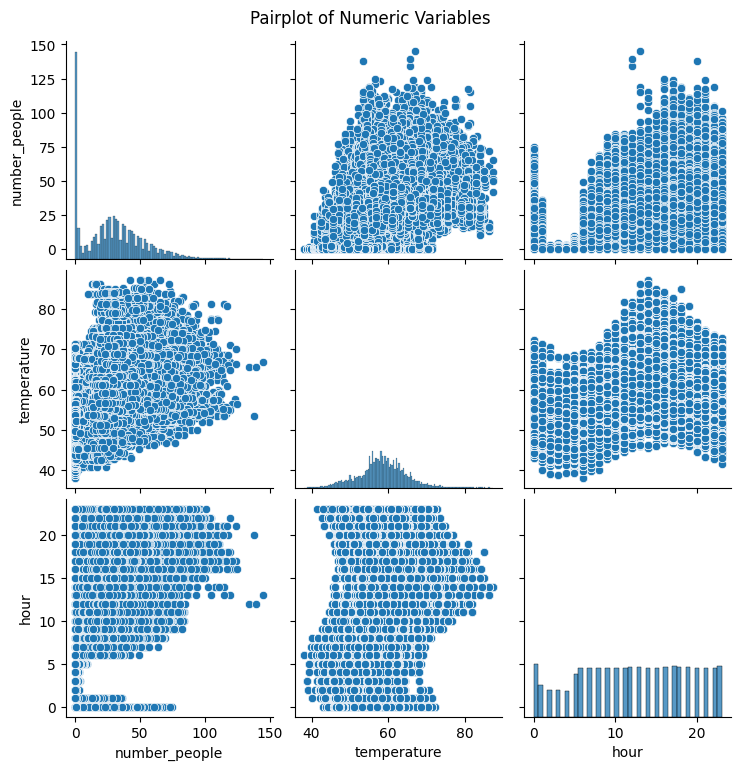

In [69]:

# Bivariate Analysis
# Numeric vs Numeric
plt.figure(figsize=(15, 15))
sns.pairplot(data[numeric_cols])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()


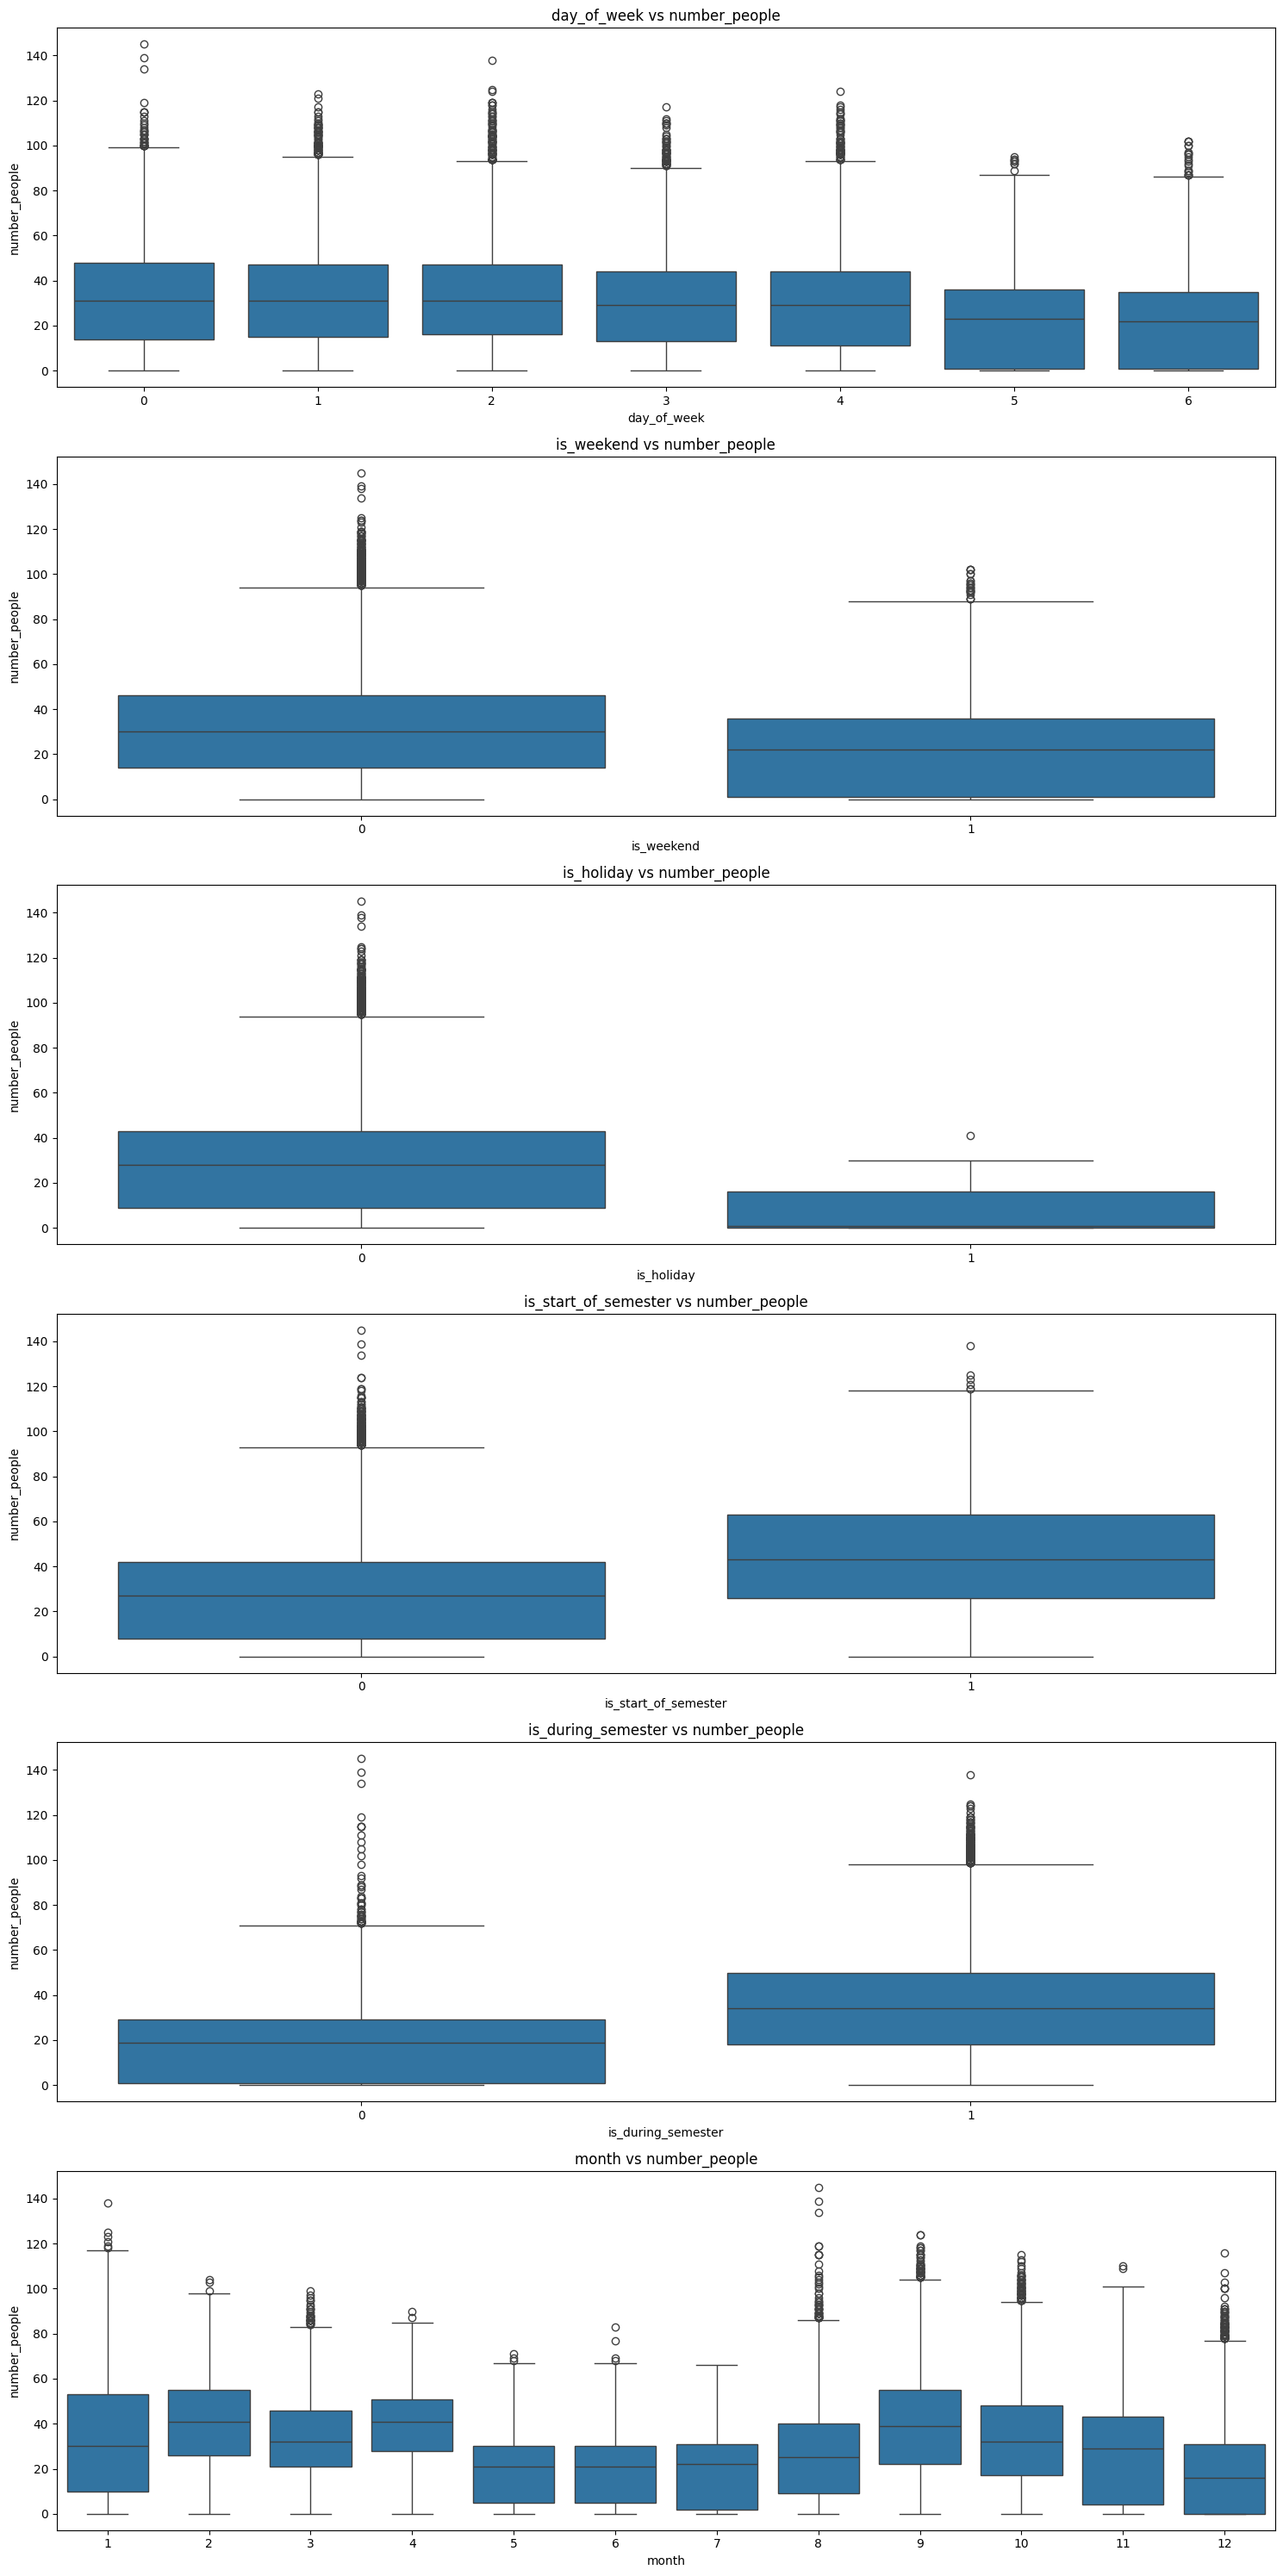

In [70]:

# Categorical vs Numeric (number_people)
plt.figure(figsize=(15, 5*len(categorical_cols)))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i+1)
    sns.boxplot(data=data, x=col, y='number_people')
    plt.title(f'{col} vs number_people')
plt.tight_layout()
plt.show()




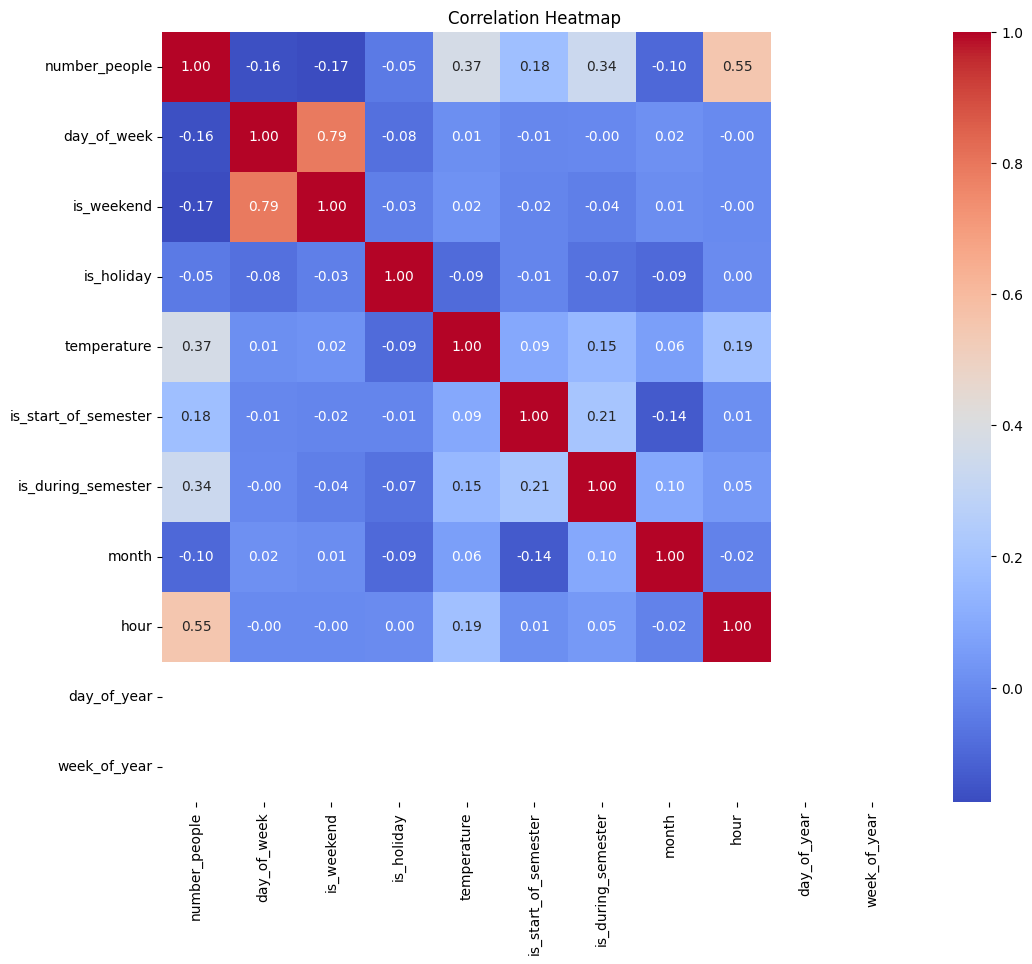

In [71]:
# Correlation heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['day_of_year'] = data['timestamp'].dt.dayofyear
data['week_of_year'] = data['timestamp'].dt.isocalendar().week
# Extract numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Create correlation matrix for numeric columns only
correlation_matrix = data[numeric_cols].corr()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



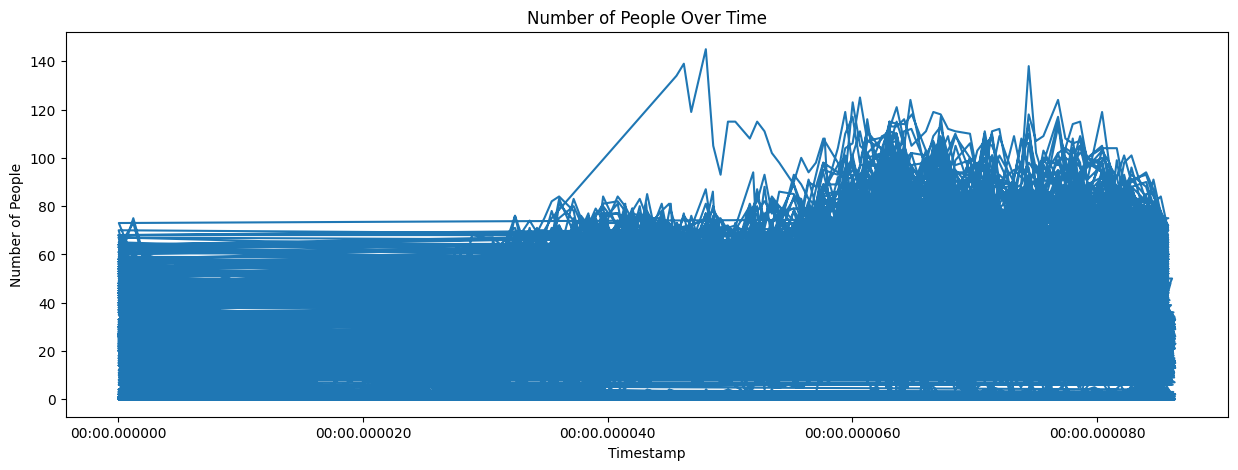

In [72]:
# Time series plot
plt.figure(figsize=(15, 5))
plt.plot(data['timestamp'], data['number_people'])
plt.title('Number of People Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of People')
plt.show()

In [43]:

# Outlier Detection
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}:")
    print(outliers)



Outliers in number_people:
       number_people                       date                     timestamp  \
929              134  2015-08-24 12:40:17-07:00 1970-01-01 00:00:00.000045617   
930              139  2015-08-24 12:50:19-07:00 1970-01-01 00:00:00.000046219   
931              119  2015-08-24 13:00:22-07:00 1970-01-01 00:00:00.000046822   
932              145  2015-08-24 13:20:17-07:00 1970-01-01 00:00:00.000048017   
933              105  2015-08-24 13:30:22-07:00 1970-01-01 00:00:00.000048622   
...              ...                        ...                           ...   
20092             95  2016-03-07 21:40:13-08:00 1970-01-01 00:00:00.000078013   
20096             95  2016-03-07 22:30:15-08:00 1970-01-01 00:00:00.000081015   
20283             96  2016-03-09 21:30:14-08:00 1970-01-01 00:00:00.000077414   
20462             99  2016-03-11 17:30:15-08:00 1970-01-01 00:00:00.000063015   
43886            108  2016-09-13 16:02:13-07:00 1970-01-01 00:00:00.000057733   


In [73]:

# Statistical Tests
print("\nStatistical Tests:")
for col in numeric_cols:
    stat, p = stats.normaltest(data[col])
    print(f"{col} normality test p-value: {p}")




Statistical Tests:
number_people normality test p-value: 0.0
day_of_week normality test p-value: 0.0
is_weekend normality test p-value: 0.0
is_holiday normality test p-value: 0.0
temperature normality test p-value: 0.0
is_start_of_semester normality test p-value: 0.0
is_during_semester normality test p-value: 0.0
month normality test p-value: 0.0
hour normality test p-value: 0.0
day_of_year normality test p-value: nan
week_of_year normality test p-value: nan


c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1615: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1819: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False, _no_deco=True)
c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1615: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1819: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when 

In [48]:
# Check for multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def calc_vif(X):
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif

# print("\nVariance Inflation Factors:")
# print(calc_vif(data[numeric_cols + categorical_cols]))

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

def calc_vif(X):
    X_const = pd.concat([X, pd.Series(1, index=X.index, name='const')], axis=1)
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for numeric columns
print("\nVariance Inflation Factors for numeric columns:")
print(calc_vif(data[numeric_cols]))

# Calculate VIF for each categorical column separately
for col in categorical_cols:
    print(f"\nVariance Inflation Factors for {col}:")
    encoded = pd.get_dummies(data[col], drop_first=True)
    if encoded.shape[1] > 0:  # Only calculate if there are encoded columns
        print(calc_vif(encoded))
    else:
        print("No VIF calculated (binary category or constant)")

# If you want to check correlations between numeric features:
correlation_matrix = data[numeric_cols].corr()
print("\nCorrelation matrix for numeric features:")
print(correlation_matrix)

# Print highly correlated pairs
print("\nHighly correlated numeric feature pairs:")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        if abs(correlation_matrix.iloc[i,j]) > 0.7:  # You can adjust this threshold
            print(f"{numeric_cols[i]} and {numeric_cols[j]}: {correlation_matrix.iloc[i,j]}")


Variance Inflation Factors for numeric columns:
              variables       VIF
0         number_people  2.036590
1           day_of_week  2.710520
2            is_weekend  2.713208
3            is_holiday  1.028575
4           temperature  1.194406
5  is_start_of_semester  1.093604
6    is_during_semester  1.229817
7                 month  1.077303
8                  hour  1.529798

Variance Inflation Factors for date:


MemoryError: Unable to allocate 28.8 GiB for an array with shape (62184, 62184) and data type object

In [21]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt




# 1. Logarithmic transformation for 'number_people'
# data['log_number_people'] = np.log1p(data['number_people'])

# 2. Standardization for numeric columns
numeric_cols = ['number_people', 'temperature']
scaler = StandardScaler()
data[['scaled_' + col for col in numeric_cols]] = scaler.fit_transform(data[numeric_cols])


In [17]:

# 3. Min-Max scaling for 'hour'
minmax_scaler = MinMaxScaler()
data['scaled_hour'] = minmax_scaler.fit_transform(data[['hour']])



In [18]:
# 4. Robust scaling for 'temperature' (less sensitive to outliers)
robust_scaler = RobustScaler()
data['robust_scaled_temperature'] = robust_scaler.fit_transform(data[['temperature']])



In [77]:
# 5. One-hot encoding for categorical variables
categorical_cols = ['day_of_week', 'is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester', 'month']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data, encoded_df], axis=1)



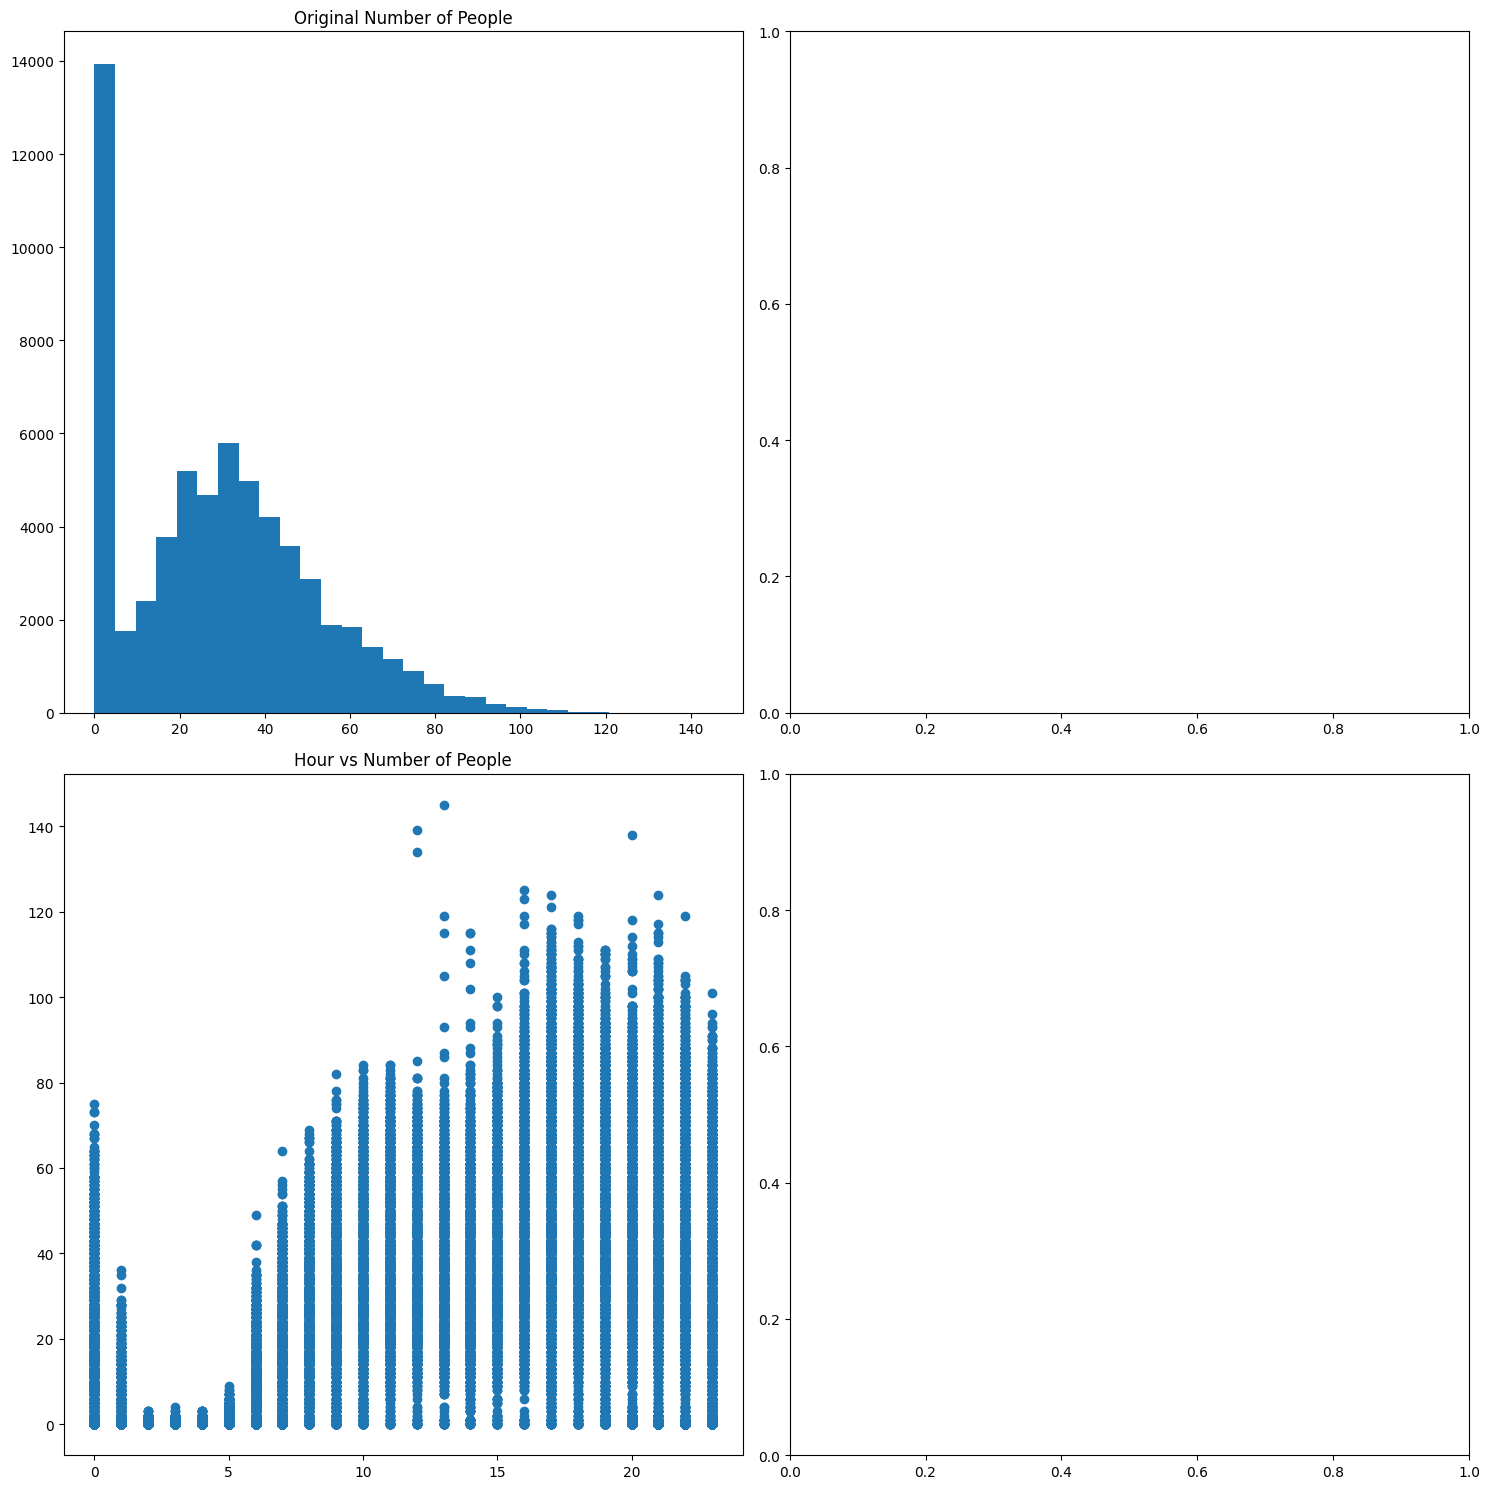

   number_people                       date                     timestamp  \
0             37  2015-08-14 17:00:11-07:00 1970-01-01 00:00:00.000061211   
1             45  2015-08-14 17:20:14-07:00 1970-01-01 00:00:00.000062414   
2             40  2015-08-14 17:30:15-07:00 1970-01-01 00:00:00.000063015   
3             44  2015-08-14 17:40:16-07:00 1970-01-01 00:00:00.000063616   
4             45  2015-08-14 17:50:17-07:00 1970-01-01 00:00:00.000064217   

   day_of_week  is_weekend  is_holiday  temperature  is_start_of_semester  \
0            4           0           0        71.76                     0   
1            4           0           0        71.76                     0   
2            4           0           0        71.76                     0   
3            4           0           0        71.76                     0   
4            4           0           0        71.76                     0   

   is_during_semester  month  ...  month_4  month_5  month_6  month_7  \
0

In [58]:
# . Binning 'hour' into time periods
data['time_period'] = pd.cut(data['hour'], 
                             bins=[0, 6, 12, 18, 24],
                             labels = [0,1,2,3]
                            )


# Visualize some transformations
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].hist(data['number_people'], bins=30)
axs[0, 0].set_title('Original Number of People')

# axs[0, 1].hist(data['log_number_people'], bins=30)
# axs[0, 1].set_title('Log-transformed Number of People')

axs[1, 0].scatter(data['hour'], data['number_people'])
axs[1, 0].set_title('Hour vs Number of People')

plt.tight_layout()
plt.show()

print(data.head())

In [78]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm


# Prepare the features and target
X = data.drop(['number_people', 'timestamp', 'date'], axis=1)  # Adjust column names as needed
y = data['number_people']

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Build initial model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:

# Check feature significance
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [81]:

# Iterative feature selection
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['is_during_semester', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_5', 'day_of_week_6', 'is_weekend_0', 'is_weekend_1',
       'is_during_semester_0', 'is_during_semester_1'],
      dtype='object')


In [82]:
# Rebuild model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

LinearRegression()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['day_of_week', 'is_weekend', 'is_holiday', 'temperature',
       'is_start_of_semester', 'is_during_semester', 'month', 'hour',
       'scaled_number_people', 'scaled_temperature', 'scaled_hour',
       'robust_scaled_temperature', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'log_number_p...
       'is_holiday_1', 'is_start_of_semester_0', 'is_start_of_semester_1',
       'is_during_semester_0', 'is_during_semester_1', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['time_period'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [83]:
y_pred = model_selected.predict(X_test_selected)


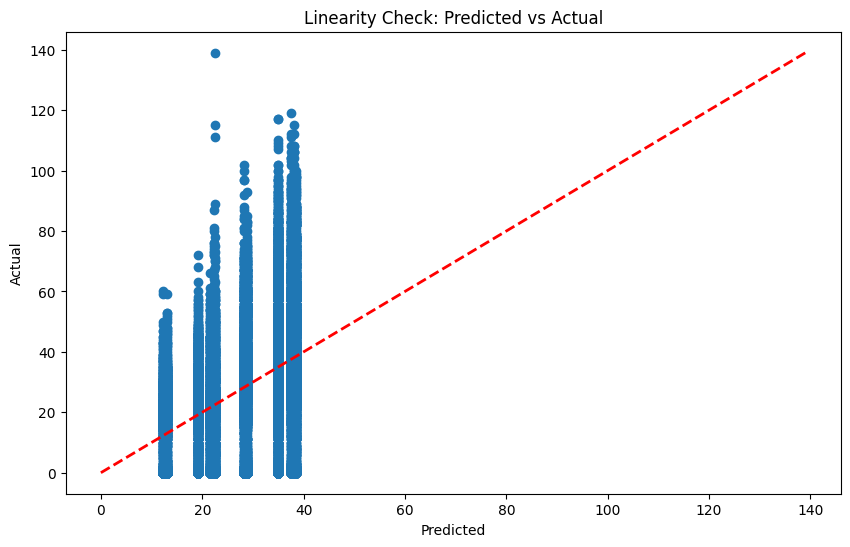

In [84]:
# Model assumptions checks

# 1. Linearity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linearity Check: Predicted vs Actual')
plt.show()


In [85]:
# 2. Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(len(X_train_selected.columns))]
print("VIF for selected features:")
print(vif_data)

VIF for selected features:
                feature           VIF
0    is_during_semester  2.351481e+06
1         day_of_week_0  1.288409e+00
2         day_of_week_1  1.297396e+00
3         day_of_week_2  1.290893e+00
4         day_of_week_5  2.724435e+08
5         day_of_week_6  8.135060e+07
6          is_weekend_0  8.494017e+05
7          is_weekend_1  2.139801e+06
8  is_during_semester_0  2.074655e+04
9  is_during_semester_1  1.106242e+04


In [86]:
# 3. Autocorrelation
residuals = y_test - y_pred
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 2.0068884220814067


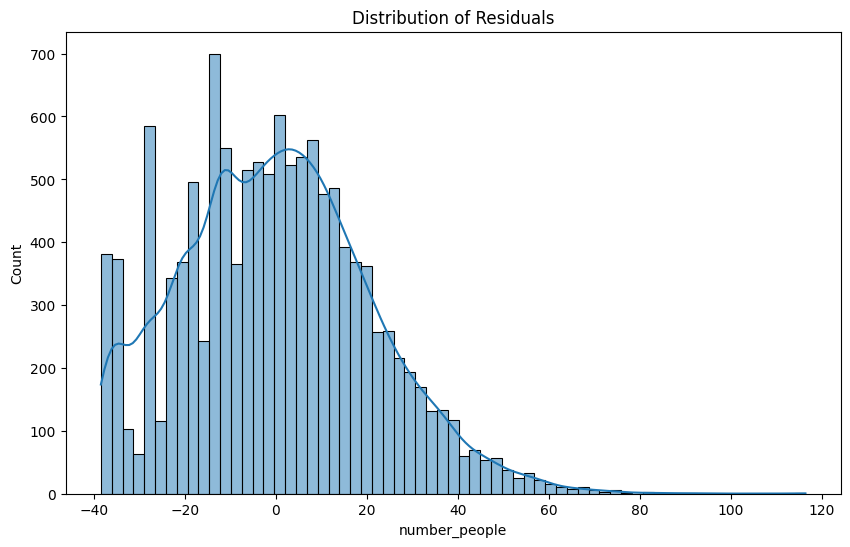

In [87]:
# 4. Normality of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()


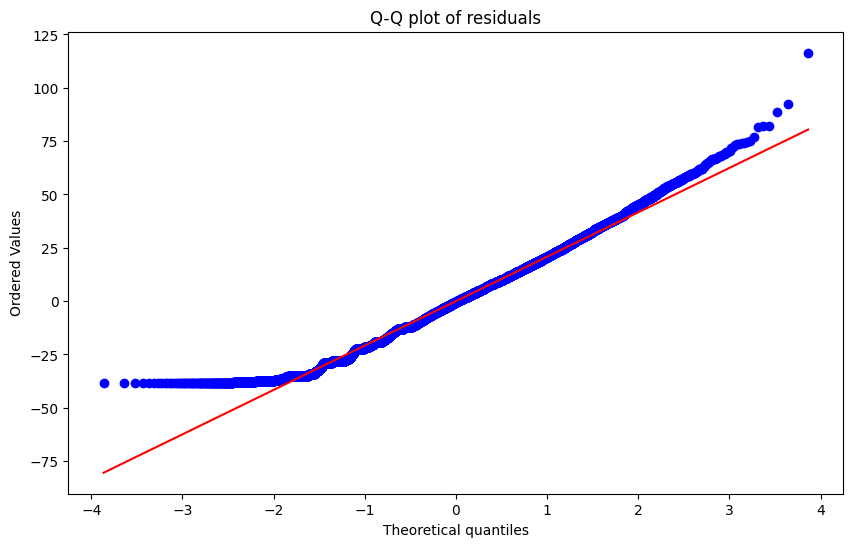

In [88]:
# QQ plot
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 6))
_, (__, ___, r) = stats.probplot(residuals, plot=ax, fit=True)
ax.set_title("Q-Q plot of residuals")
plt.show()

In [90]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 438.75942486492113
R-squared: 0.15108565769940885


In [92]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predictions
y_pred_train = model_selected.predict(X_train_selected)
y_pred_test = model_selected.predict(X_test_selected)

# Model Evaluation

def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nModel Performance on {dataset_name} data:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    
    return mse, rmse, mae, r2

# Evaluate on train and test data
train_metrics = evaluate_model(y_train, y_pred_train, "Training")
test_metrics = evaluate_model(y_test, y_pred_test, "Test")




Model Performance on Training data:
Mean Squared Error: 442.4760
Root Mean Squared Error: 21.0351
Mean Absolute Error: 16.8765
R-squared: 0.1396

Model Performance on Test data:
Mean Squared Error: 438.7594
Root Mean Squared Error: 20.9466
Mean Absolute Error: 16.8607
R-squared: 0.1511


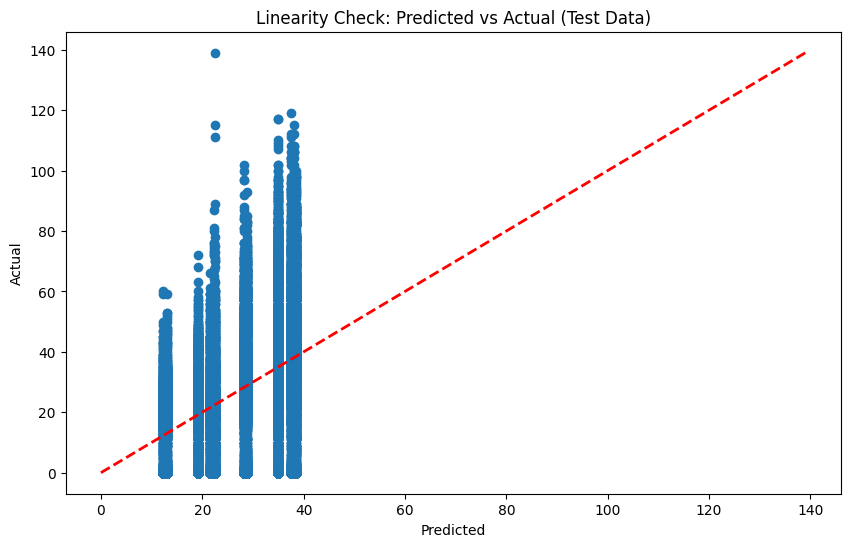

In [93]:
# Model Goodness Checks

# 1. Linearity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linearity Check: Predicted vs Actual (Test Data)')
plt.show()


In [94]:

# 2. Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(len(X_train_selected.columns))]
print("\nVIF for selected features:")
print(vif_data)



VIF for selected features:
                feature           VIF
0    is_during_semester  2.351481e+06
1         day_of_week_0  1.288409e+00
2         day_of_week_1  1.297396e+00
3         day_of_week_2  1.290893e+00
4         day_of_week_5  2.724435e+08
5         day_of_week_6  8.135060e+07
6          is_weekend_0  8.494017e+05
7          is_weekend_1  2.139801e+06
8  is_during_semester_0  2.074655e+04
9  is_during_semester_1  1.106242e+04


In [95]:

# 3. Autocorrelation
residuals = y_test - y_pred_test
dw_statistic = durbin_watson(residuals)
print(f"\nDurbin-Watson statistic: {dw_statistic:.4f}")



Durbin-Watson statistic: 2.0069


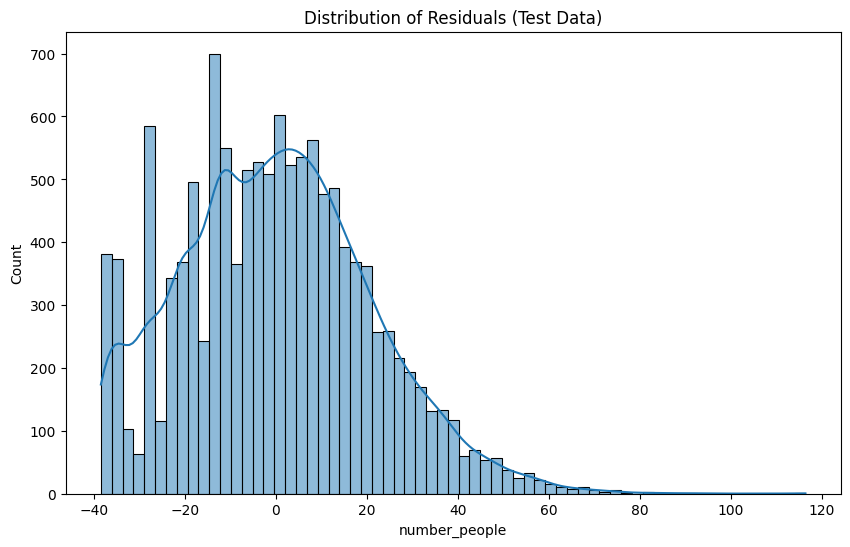

In [96]:

# 4. Normality of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Test Data)')
plt.show()


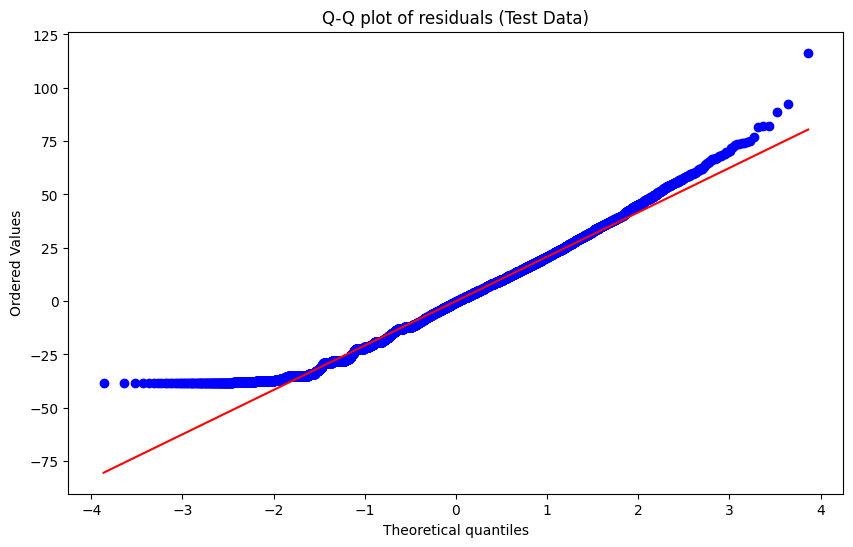

In [97]:

# QQ plot
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q plot of residuals (Test Data)")
plt.show()


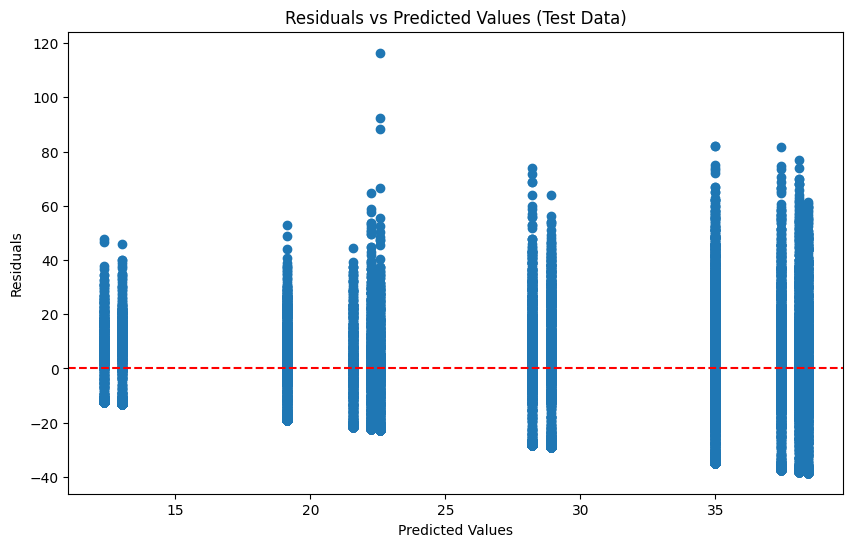

In [98]:

# 5. Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Data)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [99]:

# Feature Importance
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model_selected.coef_
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Importance:")
print(coefficients)



Feature Importance:
                Feature   Coefficient
7          is_weekend_1 -2.748317e+12
0    is_during_semester  1.973516e+12
6          is_weekend_0 -1.674214e+12
4         day_of_week_5  1.074103e+12
5         day_of_week_6  1.074103e+12
9  is_during_semester_1 -9.867578e+11
8  is_during_semester_0  9.867578e+11
1         day_of_week_0  3.447998e+00
2         day_of_week_1  3.105770e+00
3         day_of_week_2  2.439642e+00


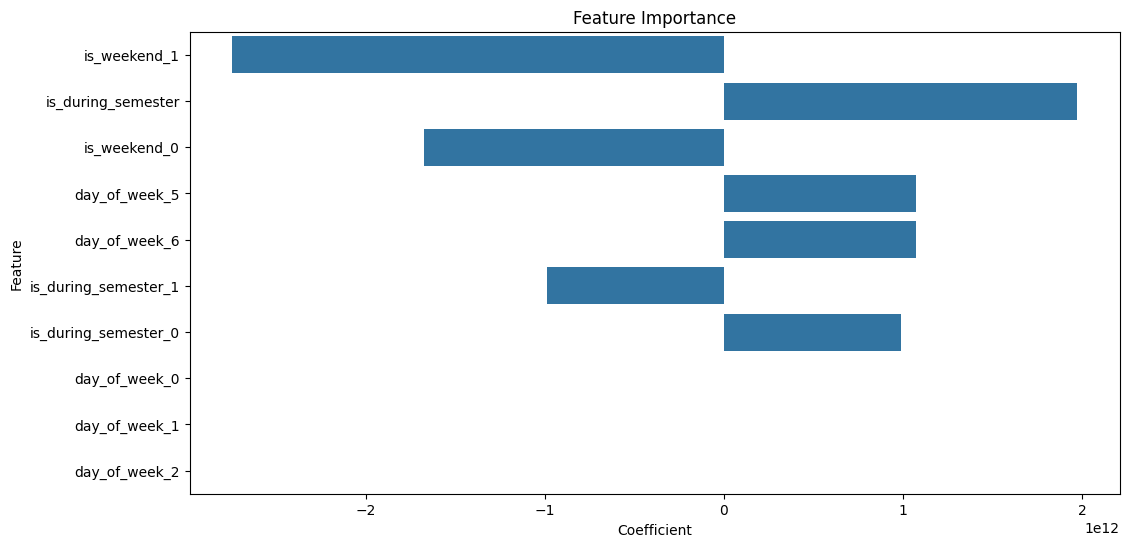

In [100]:

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()


In [101]:

# Model Performance Comparison
performance_comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Training': train_metrics,
    'Test': test_metrics
})
print("\nModel Performance Comparison:")
print(performance_comparison)



Model Performance Comparison:
      Metric    Training        Test
0        MSE  442.476005  438.759425
1       RMSE   21.035114   20.946585
2        MAE   16.876518   16.860737
3  R-squared    0.139599    0.151086


<Figure size 1000x600 with 0 Axes>

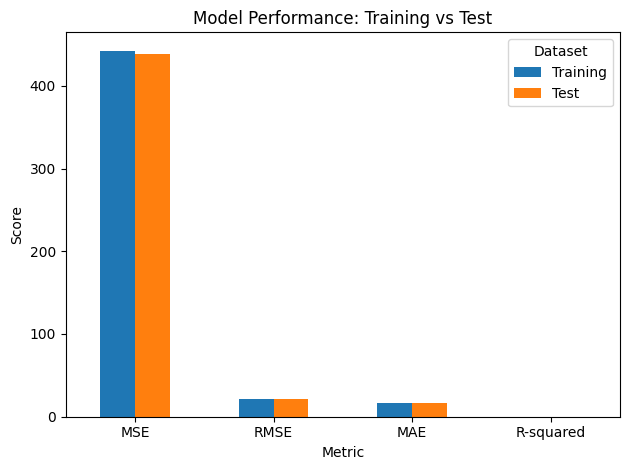

In [102]:

# Visualize performance comparison
plt.figure(figsize=(10, 6))
performance_comparison.set_index('Metric').plot(kind='bar')
plt.title('Model Performance: Training vs Test')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()